<a href="https://colab.research.google.com/github/DiogodosSantosS/DiogodosSantosS/blob/main/Projeto_Final_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA IMPORT

In [ ]:
! gdown --id 1agwsPAlTA4ltiX2RHVEZqcjsMsw1uV7z

Downloading...
From: https://drive.google.com/uc?id=1agwsPAlTA4ltiX2RHVEZqcjsMsw1uV7z
To: /content/Machine Learning Data (Hired)_test.csv
100% 1.62M/1.62M [00:00<00:00, 98.2MB/s]


In [ ]:
! gdown --id 1bhXK8F41XPQPTbFzh-3ubQ72ueQzlpxx

Downloading...
From: https://drive.google.com/uc?id=1bhXK8F41XPQPTbFzh-3ubQ72ueQzlpxx
To: /content/Machine Learning Data (Improved).csv
100% 1.94M/1.94M [00:00<00:00, 62.3MB/s]


In [ ]:
# For data processing
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as po
po.init_notebook_mode(connected=False)
import plotly.io as pio
pio.renderers.default='notebook'

# Set seaborn colors
#sns.set_palette('YlGnBu_r')
#sns.set_palette('Spectral_r')
sns.set_palette('Set2')
#sns.set_palette('PuBu')
#sns.set_palette('pastel')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dfh = pd.read_csv('/content/Machine Learning Data (Hired)_test.csv', sep=',', encoding='utf-8')

In [ ]:
dfi = pd.read_csv('/content/Machine Learning Data (Improved).csv', sep=',', encoding='utf-8')

## DATA EXPLORATION HIRED

In [ ]:
dfh.head()

application  ...    source
0                                   NaN  ...       NaN
1  00007e55-9fa5-4c44-b059-7f4ec88cda91  ...   applied
2  0005b700-75f7-4fb0-a970-b55e2e48daca  ...   applied
3  0007994b-0c99-47cd-bc7b-8c8c2d6a86c5  ...  referred
4  000cbc9c-50af-4933-b45f-1545edfbf20c  ...   sourced

[5 rows x 13 columns]

In [ ]:
dfh.describe()

Average_score    Interviews  ...  Good_role_M  Phone Screening
count   21727.000000  21727.000000  ...  6786.000000     16367.000000
mean        2.701708      1.993004  ...     2.741527         0.694691
std         0.670720      1.266717  ...     0.784019         0.460552
min         1.000000      1.000000  ...     1.000000         0.000000
25%         2.000000      1.000000  ...     2.000000         0.000000
50%         3.000000      1.000000  ...     3.000000         1.000000
75%         3.000000      3.000000  ...     3.000000         1.000000
max         4.000000      9.000000  ...     4.000000         1.000000

[8 rows x 11 columns]

In [ ]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25557 entries, 0 to 25556
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   application        25556 non-null  object 
 1   Average_score      21727 non-null  float64
 2   Interviews         21727 non-null  float64
 3   Interview_minutes  21728 non-null  float64
 4   Hired              25556 non-null  float64
 5   Good_farfetch_R    4363 non-null   float64
 6   Good_farfetch_M    1877 non-null   float64
 7   Good_growth_I      1499 non-null   float64
 8   Good_growth_M      4439 non-null   float64
 9   Good_role_I        5577 non-null   float64
 10  Good_role_M        6786 non-null   float64
 11  Phone Screening    16367 non-null  float64
 12  source             25556 non-null  object 
dtypes: float64(11), object(2)
memory usage: 2.5+ MB


In [ ]:
dfh.isnull().sum()

application              1
Average_score         3830
Interviews            3830
Interview_minutes     3829
Hired                    1
Good_farfetch_R      21194
Good_farfetch_M      23680
Good_growth_I        24058
Good_growth_M        21118
Good_role_I          19980
Good_role_M          18771
Phone Screening       9190
source                   1
dtype: int64

In [ ]:
dfh['Average_score'].value_counts(dropna=False)

3.0    11631
2.0     7483
NaN     3830
4.0     2076
1.0      537
Name: Average_score, dtype: int64

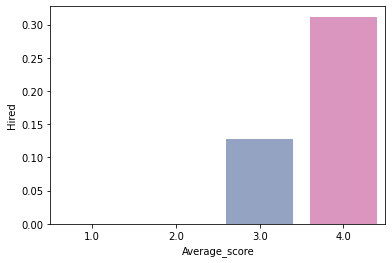

In [ ]:
#Encontramos 2 pessoas com '1' com performance e sem Hire date
sns.barplot(x='Average_score', y='Hired', ci=None, data=dfh)

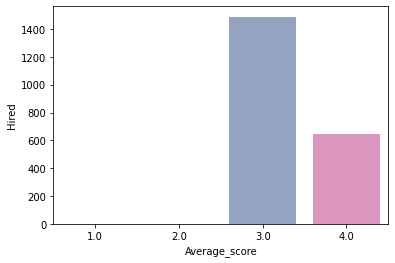

In [ ]:
#Foram contratadas 11 pessoas que tiveram '2' na entrevista. Não bate certo com o valor da outra tabela
sns.barplot(x='Average_score', y='Hired', estimator=np.sum, ci=None, data=dfh)

In [ ]:
dfh.corr()

Average_score  Interviews  ...  Good_role_M  Phone Screening
Average_score           1.000000    0.374331  ...     0.744596         0.782740
Interviews              0.374331    1.000000  ...     0.412992         0.468941
Interview_minutes      -0.008062    0.244131  ...    -0.041321         0.160415
Hired                   0.295969    0.414770  ...     0.349539         0.195962
Good_farfetch_R         0.751076    0.245406  ...     0.495352         0.128891
Good_farfetch_M         0.663972    0.124720  ...     0.358737         0.008055
Good_growth_I           0.699274    0.041300  ...     0.379957         0.028707
Good_growth_M           0.678377    0.136632  ...     0.381293         0.079538
Good_role_I             0.789524    0.384742  ...     0.630775         0.050496
Good_role_M             0.744596    0.412992  ...     1.000000         0.093970
Phone Screening         0.782740    0.468941  ...     0.093970         1.000000

[11 rows x 11 columns]

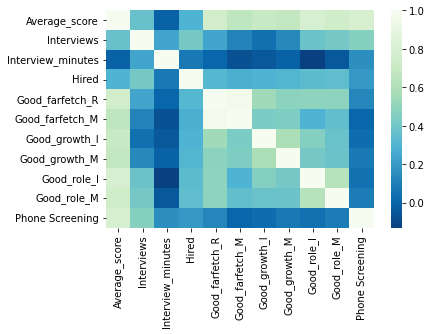

In [ ]:
sns.heatmap(dfh.corr(), cmap='GnBu_r')

## DATA EXPLORATION IMPROVED

In [ ]:
dfi.head(20)

application  Average_score  ...      location    source
0                                    NaN            NaN  ...           NaN       NaN
1   00007e55-9fa5-4c44-b059-7f4ec88cda91            1.0  ...     PT Lisbon   applied
2   0005b700-75f7-4fb0-a970-b55e2e48daca            4.0  ...      PT Porto   applied
3   0007994b-0c99-47cd-bc7b-8c8c2d6a86c5            3.0  ...      PT Porto  referred
4   000cbc9c-50af-4933-b45f-1545edfbf20c            3.0  ...     UK London   sourced
5   000f5d7d-0566-4208-a7f9-f1d050283279            2.0  ...      PT Porto   applied
6   0011ccb2-2198-48b7-8205-fa478ab65964            3.0  ...  PT Guimarães   applied
7   00144026-bb0e-4780-ba43-d05876affaf9            3.0  ...      PT Porto   applied
8   00169be3-f4ac-4b4d-a197-524b082ef6c9            3.0  ...     UK London   applied
9   0019c68a-6ae2-445c-a016-79892c46ff38            4.0  ...      PT Porto   applied
10  001a0157-c30d-4c15-b16e-4900b19c7244            3.0  ...      PT Porto   applied
11  001a9142-130e-47df-988a-3d8f8931f8d8            NaN  ...      PT Porto    agency
12  001d01c7-8d04-45c9-9f7d-2a2ba8899a7a            2.0  ...      PT Porto   sourced
13  002414b4-4f30-4ccc-b065-c8d480ac7938            2.0  ...      PT Porto   applied
14  00298ffd-b167-4fce-8a7c-cfcaa67d7eb4            3.0  ...     UK London   applied
15  0029e541-adab-4200-bdfe-6c2264ab6795            3.0  ...      JP Tokyo    agency
16  002bf5a0-e2d2-4bd6-87ce-13a7a78b8aa8            3.0  ...      PT Porto   applied
17  002ef3b4-059d-4912-bae7-16001755da06            2.0  ...     UK London   applied
18  002ef9db-38a2-4589-9119-940aaf82514c            3.0  ...     UK London   applied
19  002f1246-322e-4211-a2f8-c67708fe693d            1.0  ...  BR São Paulo   applied

[20 rows x 16 columns]

In [ ]:
dfi.describe()

Average_score    Interviews  ...  Good_role_M  Good_role_R
count   21727.000000  21727.000000  ...  6786.000000   880.000000
mean        2.701708      1.993004  ...     2.741527     2.743182
std         0.670720      1.266717  ...     0.784019     0.666063
min         1.000000      1.000000  ...     1.000000     1.000000
25%         2.000000      1.000000  ...     2.000000     2.000000
50%         3.000000      1.000000  ...     3.000000     3.000000
75%         3.000000      3.000000  ...     3.000000     3.000000
max         4.000000      9.000000  ...     4.000000     4.000000

[8 rows x 13 columns]

In [ ]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25557 entries, 0 to 25556
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   application       25556 non-null  object 
 1   Average_score     21727 non-null  float64
 2   Interviews        21727 non-null  float64
 3   Gender            1449 non-null   float64
 4   Target(improved)  25556 non-null  float64
 5   Good_farfetch_I   859 non-null    float64
 6   Good_farfetch_M   1877 non-null   float64
 7   Good_farfetch_R   4363 non-null   float64
 8   Good_growth_I     1499 non-null   float64
 9   Good_growth_M     4439 non-null   float64
 10  Good_growth_R     377 non-null    float64
 11  Good_role_I       5577 non-null   float64
 12  Good_role_M       6786 non-null   float64
 13  Good_role_R       880 non-null    float64
 14  location          25014 non-null  object 
 15  source            25556 non-null  object 
dtypes: float64(13), object(3)
memory usage: 

In [ ]:
dfi.isnull().sum()

application             1
Average_score        3830
Interviews           3830
Gender              24108
Target(improved)        1
Good_farfetch_I     24698
Good_farfetch_M     23680
Good_farfetch_R     21194
Good_growth_I       24058
Good_growth_M       21118
Good_growth_R       25180
Good_role_I         19980
Good_role_M         18771
Good_role_R         24677
location              543
source                  1
dtype: int64

In [ ]:
dfi['Average_score'].value_counts(dropna=False)

3.0    11631
2.0     7483
NaN     3830
4.0     2076
1.0      537
Name: Average_score, dtype: int64

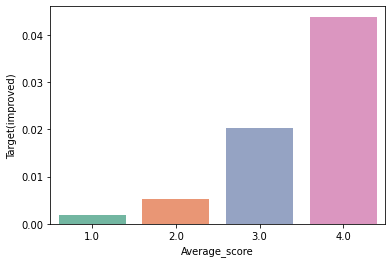

In [ ]:
#Qd apagarmos os 2 valor que estão mal , não pode haver valor no '1'
#No valor '2' temos 78 pessoas que têm performance. Temos 11 que foram contratadas. E temos 7 que têm Performance e foram contratadas
sns.barplot(x='Average_score', y='Target(improved)', ci=None, data=dfi)

In [ ]:
#O grafico anterior mostrava irregularidades - eliminamos os nulos do average score
dfi = dfi.dropna(subset=['Average_score'])

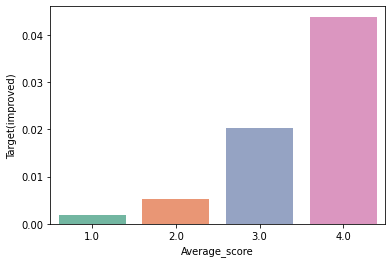

In [ ]:
#Novo gráfico sem os nulos do average score
sns.barplot(x='Average_score', y='Target(improved)', ci=None, data=dfi)

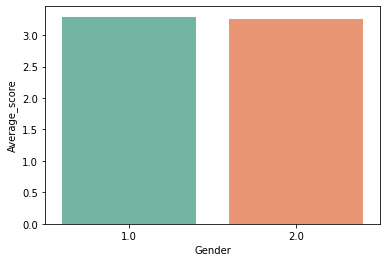

In [ ]:
# Nota da entrevista dos contratados
sns.barplot(x='Gender', y='Average_score', ci=None, data=dfi)

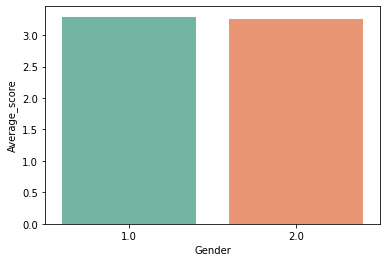

In [ ]:
#Última performance por sexo
sns.barplot(x='Gender', y='Average_score', ci=None, data=dfi)

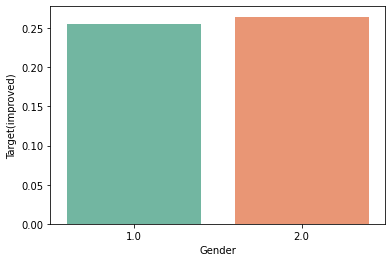

In [ ]:
#Improved por sexo
sns.barplot(x='Gender', y='Target(improved)', ci=None, data=dfi)

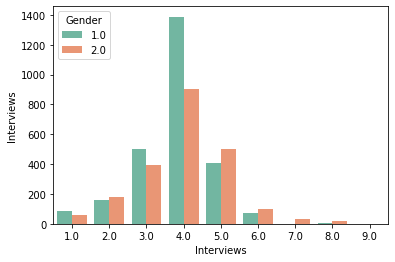

In [ ]:
#Número de entrevistas por sexo
sns.barplot(x='Interviews', y='Interviews', ci=None, hue='Gender',estimator=np.sum, data=dfi)

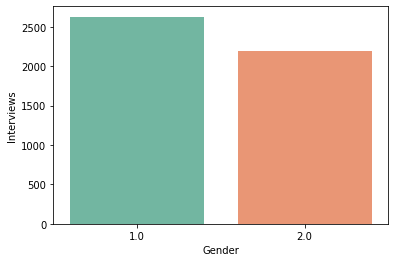

In [ ]:
#soma das entrevistas por sexo
sns.barplot(x='Gender', y='Interviews', ci=None,estimator=np.sum, data=dfi)

In [ ]:
# O que são os '0' nesta coluna?? confirmar no PowerBI
dfi['Average_score'].value_counts(dropna=False)

3.0    11631
2.0     7483
4.0     2076
1.0      537
Name: Average_score, dtype: int64

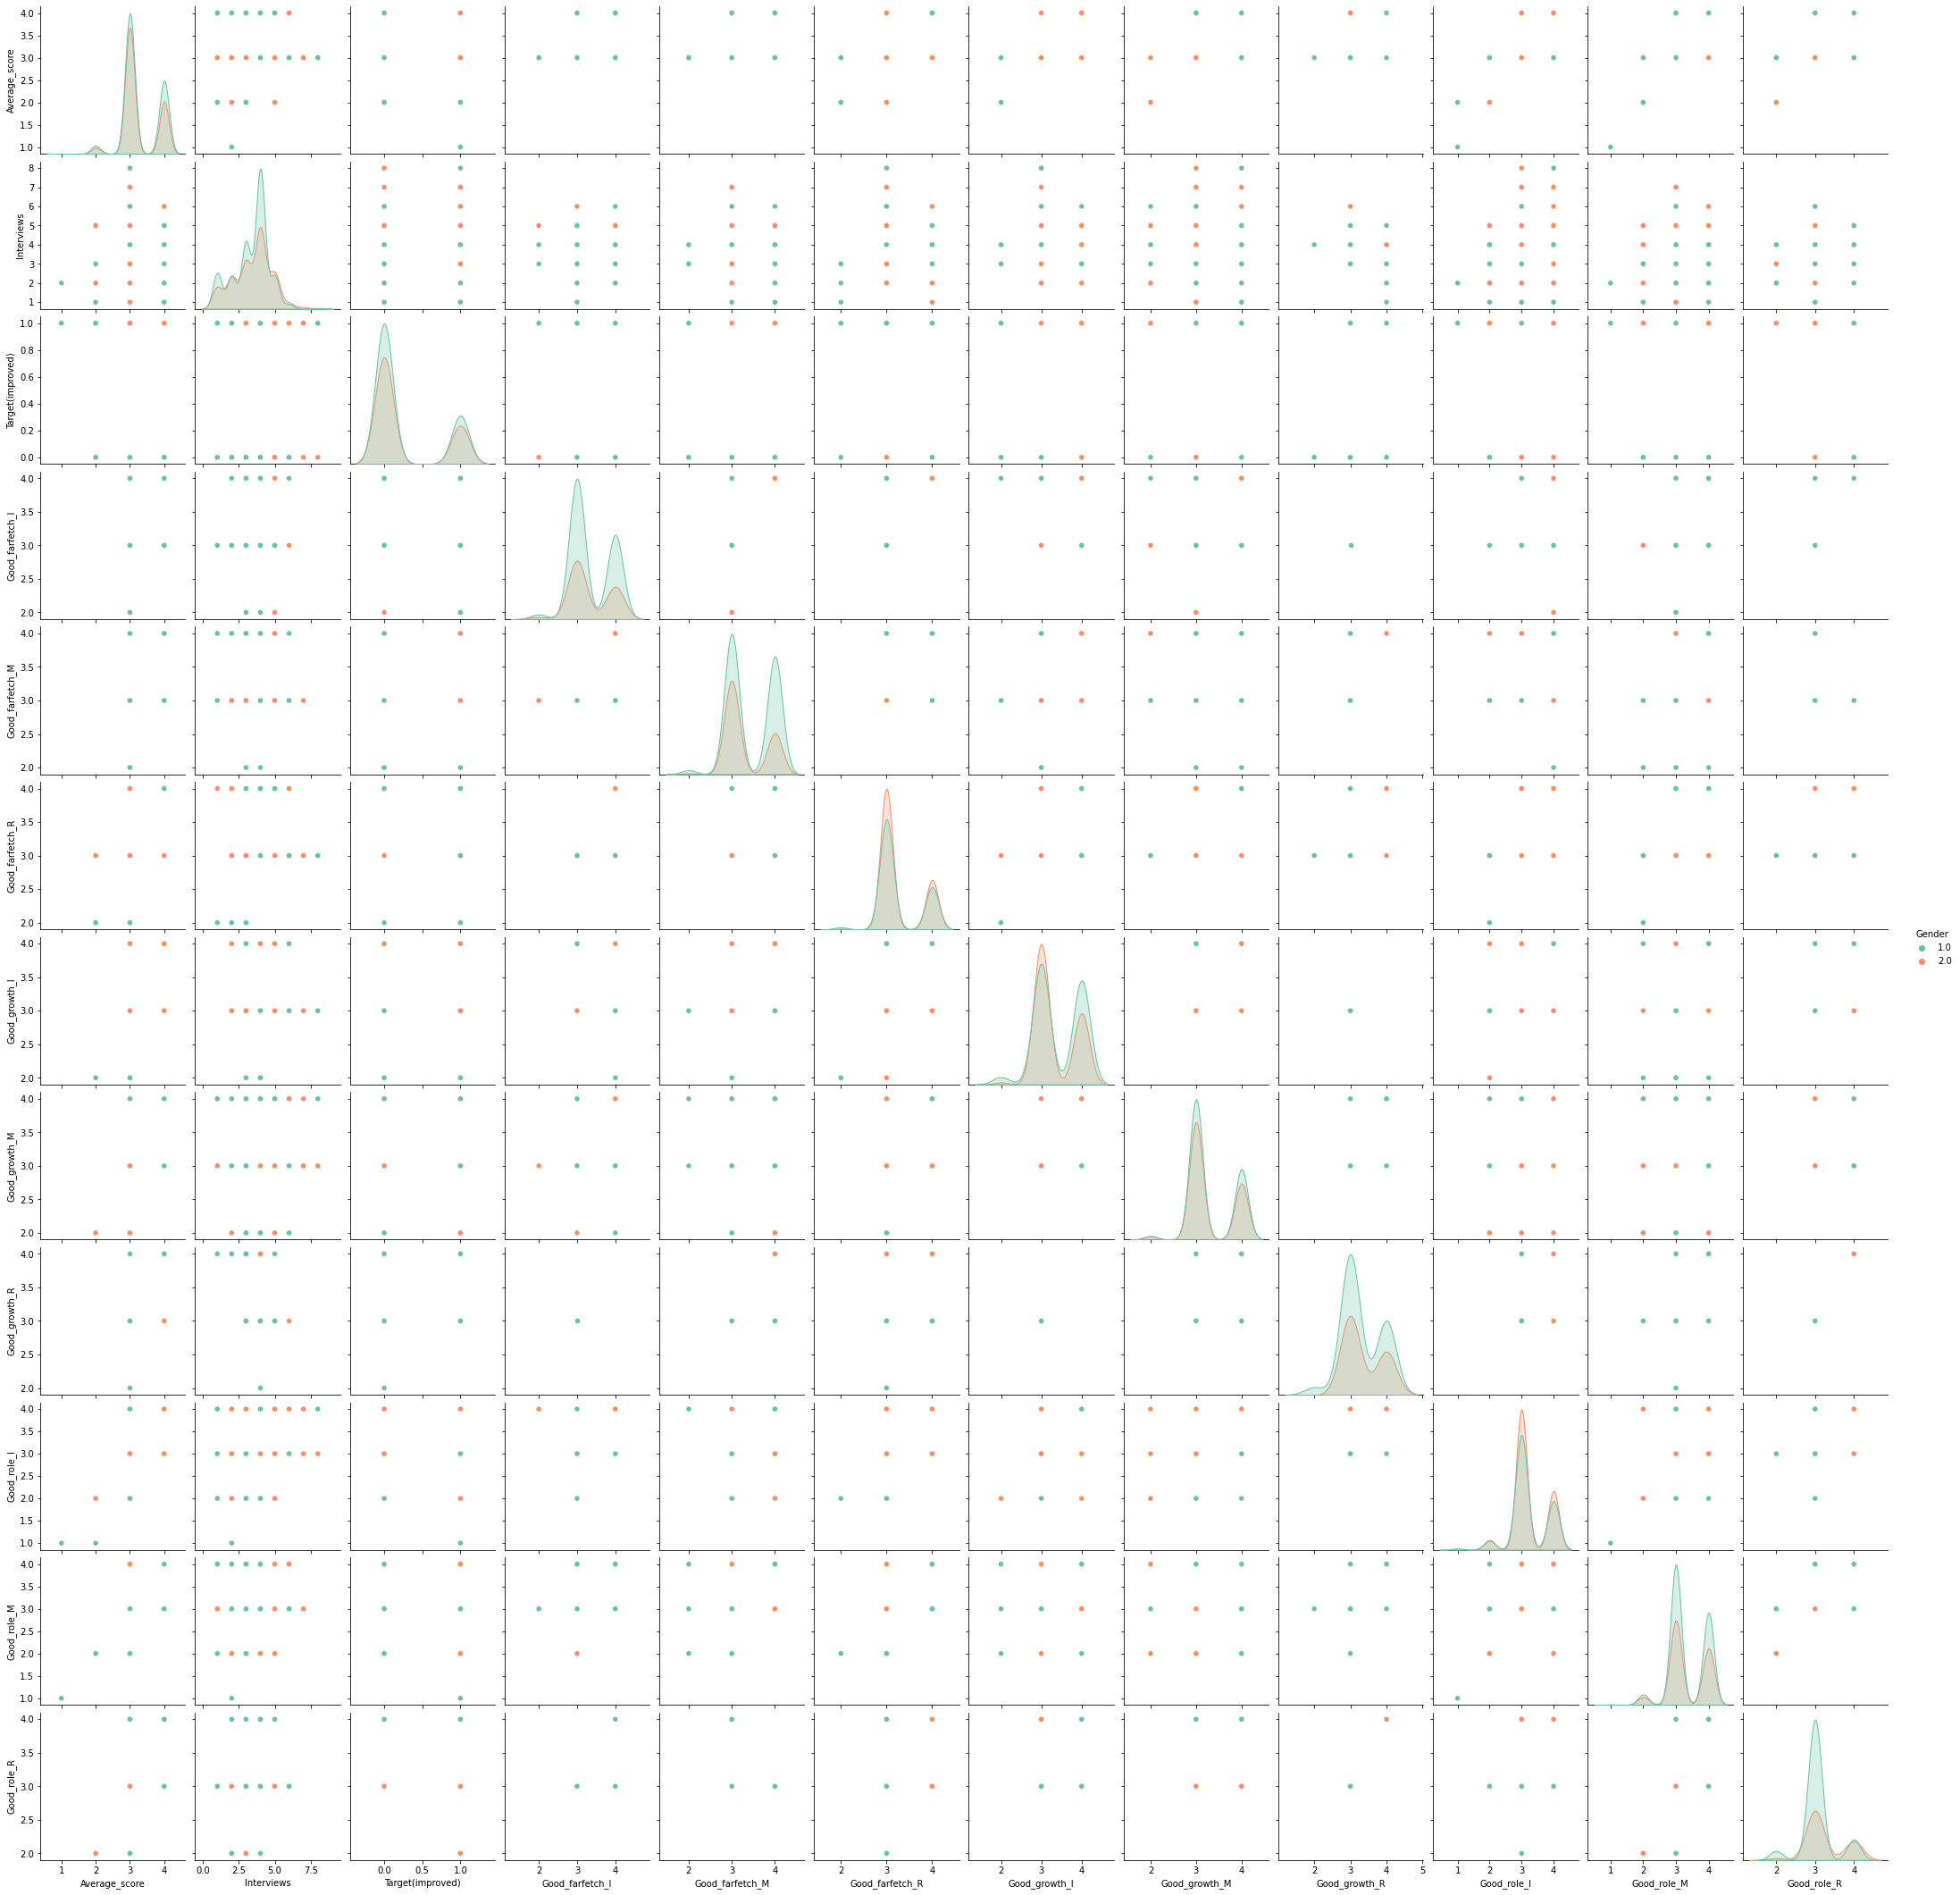

In [ ]:
sns.pairplot(dfi, hue="Gender", palette='Set2')

In [ ]:
dfi.corr()

Average_score  Interviews  ...  Good_role_M  Good_role_R
Average_score          1.000000    0.374331  ...     0.744596     0.709841
Interviews             0.374331    1.000000  ...     0.412992     0.455093
Gender                -0.037991    0.034646  ...    -0.003552     0.190026
Target(improved)       0.084923    0.129582  ...     0.104849     0.078615
Good_farfetch_I        0.598925    0.168734  ...     0.238983     0.347088
Good_farfetch_M        0.663972    0.124720  ...     0.358847     0.080103
Good_farfetch_R        0.751076    0.245406  ...     0.495805     0.189115
Good_growth_I          0.699274    0.041300  ...     0.379957     0.375774
Good_growth_M          0.678377    0.136632  ...     0.381292     0.350705
Good_growth_R          0.755872    0.161134  ...     0.424204     0.372271
Good_role_I            0.789524    0.384742  ...     0.630724     0.669929
Good_role_M            0.744596    0.412992  ...     1.000000     0.808480
Good_role_R            0.709841    0.455093  ...     0.808480     1.000000

[13 rows x 13 columns]

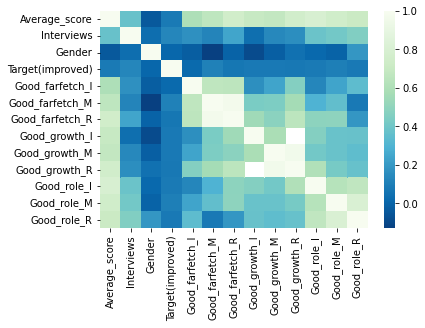

In [ ]:
sns.heatmap(dfi.corr(), cmap='GnBu_r')

## DATA MODELING HIRED

In [ ]:
#Eliminar 43 linhas sem dados
dfh = dfh.dropna(subset=['Average_score', 'application'])

In [ ]:
#Muitos resultados '3' pode indicar qlq coisa
dfh['Average_score'].value_counts(dropna=False)

3.0    11631
2.0     7483
4.0     2076
1.0      537
Name: Average_score, dtype: int64

In [ ]:
#Drop da application
dfh = dfh.drop(['application'], axis=1)

In [ ]:
# One-hot encode variables
# Get dummies
Good_farfetch_R = pd.get_dummies(dfh['Good_farfetch_R'], prefix='Good_farfetch_R', drop_first=True)
# Join the datasets
dfh2 = pd.concat([dfh, Good_farfetch_R], axis=1)
# Drop the original column
dfh2 = dfh2.drop(['Good_farfetch_R'], axis=1)

# Get dummies
Good_farfetch_M = pd.get_dummies(dfh['Good_farfetch_M'], prefix='Good_farfetch_M', drop_first=True)
# Join the datasets
dfh2 = pd.concat([dfh2, Good_farfetch_M], axis=1)
# Drop the original column
dfh2 = dfh2.drop(['Good_farfetch_M'], axis=1)

# Get dummies
Good_growth_I = pd.get_dummies(dfh['Good_growth_I'], prefix='Good_growth_I', drop_first=True)
# Join the datasets
dfh2 = pd.concat([dfh2, Good_growth_I], axis=1)
# Drop the original column
dfh2 = dfh2.drop(['Good_growth_I'], axis=1)

# Get dummies
Good_growth_M = pd.get_dummies(dfh['Good_growth_M'], prefix='Good_growth_M', drop_first=True)
# Join the datasets
dfh2 = pd.concat([dfh2, Good_growth_M], axis=1)
# Drop the original column
dfh2 = dfh2.drop(['Good_growth_M'], axis=1)

# Get dummies
Good_role_I = pd.get_dummies(dfh['Good_role_I'], prefix='Good_role_I', drop_first=True)
# Join the datasets
dfh2 = pd.concat([dfh2, Good_role_I], axis=1)
# Drop the original column
dfh2 = dfh2.drop(['Good_role_I'], axis=1)

# Get dummies
Good_role_M = pd.get_dummies(dfh['Good_role_M'], prefix='Good_role_M', drop_first=True)
# Join the datasets
dfh2 = pd.concat([dfh2, Good_role_M], axis=1)
# Drop the original column
dfh2 = dfh2.drop(['Good_role_M'], axis=1)

# Get dummies
Phone_screening = pd.get_dummies(dfh['Phone Screening'], prefix='Phone_screening', drop_first=True)
# Join the datasets
dfh2 = pd.concat([dfh2, Phone_screening], axis=1)
# Drop the original column
dfh2 = dfh2.drop(['Phone Screening'], axis=1)

# Get dummies
Source = pd.get_dummies(dfh2['source'], prefix='source', drop_first=True)
# Join the datasets
dfh2 = pd.concat([dfh2, Source], axis=1)
# Drop the original column
dfh2 = dfh2.drop(['source'], axis=1)

In [ ]:
dfh2.head()

Average_score  Interviews  ...  source_referred  source_sourced
1            1.0         1.0  ...                0               0
2            4.0         1.0  ...                0               0
3            3.0         4.0  ...                1               0
4            3.0         1.0  ...                0               1
5            2.0         2.0  ...                0               0

[5 rows x 27 columns]

In [ ]:
dfh2.shape

(21727, 27)

In [ ]:
#Verificação dos nulos
dfh2.isnull().sum()

Average_score          0
Interviews             0
Interview_minutes      0
Hired                  0
Good_farfetch_R_2.0    0
Good_farfetch_R_3.0    0
Good_farfetch_R_4.0    0
Good_farfetch_M_2.0    0
Good_farfetch_M_3.0    0
Good_farfetch_M_4.0    0
Good_growth_I_2.0      0
Good_growth_I_3.0      0
Good_growth_I_4.0      0
Good_growth_M_2.0      0
Good_growth_M_3.0      0
Good_growth_M_4.0      0
Good_role_I_2.0        0
Good_role_I_3.0        0
Good_role_I_4.0        0
Good_role_M_2.0        0
Good_role_M_3.0        0
Good_role_M_4.0        0
Phone_screening_1.0    0
source_applied         0
source_internal        0
source_referred        0
source_sourced         0
dtype: int64

In [ ]:
# Separate in Xh (variables) and yh (target) for modeling
Xh = dfh2.drop(['Hired'], axis=1)
yh = dfh2['Hired']

In [ ]:
# Split dataset in train and test datasets
from sklearn.model_selection import train_test_split
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.20, random_state=0)

In [ ]:
# check both datasets have the same distribution
yh_train.value_counts(normalize=True), yh_test.value_counts(normalize=True)

(0.0    0.90363
 1.0    0.09637
 Name: Hired, dtype: float64, 0.0    0.894156
 1.0    0.105844
 Name: Hired, dtype: float64)

Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

# Fit models to training dataset
clf_rf = RandomForestClassifier(random_state=0, bootstrap=False)
clf_rf.fit(Xh_train, yh_train)

clf_logreg = LogisticRegression(solver="lbfgs", max_iter=600, random_state=0)
clf_logreg.fit(Xh_train, yh_train)

clf_nb = GaussianNB()
clf_nb.fit(Xh_train, yh_train)

clf_knn = KNeighborsClassifier()
clf_knn.fit(Xh_train, yh_train)

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(Xh_train, yh_train)

clf_lgb = LGBMClassifier(random_state=0)
clf_lgb.fit(Xh_train, yh_train);


HIRED Train Evaluation

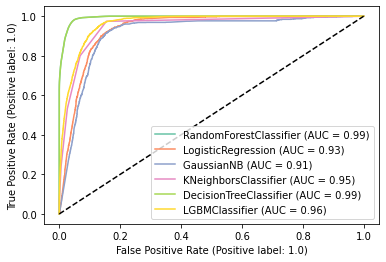

In [ ]:
# Check first AUC performance on training dataset
from sklearn.metrics import precision_recall_curve, RocCurveDisplay
from sklearn.metrics import plot_roc_curve, roc_curve

ax = plt.gca()
RocCurveDisplay.from_estimator(clf_rf, Xh_train, yh_train, ax=ax)
RocCurveDisplay.from_estimator(clf_logreg, Xh_train, yh_train, ax=ax)
RocCurveDisplay.from_estimator(clf_nb, Xh_train, yh_train, ax=ax)
RocCurveDisplay.from_estimator(clf_knn, Xh_train, yh_train, ax=ax)
RocCurveDisplay.from_estimator(clf_dt, Xh_train, yh_train, ax=ax)
RocCurveDisplay.from_estimator(clf_lgb, Xh_train, yh_train, ax=ax)


plt.plot([0,1],[0,1],  "k--");

HIRED Test Evaluation

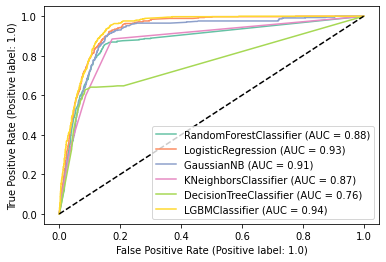

In [ ]:
# Check now AUC performance in the test dataset to assess generalization 
# capabilities of each model
ax = plt.gca()
RocCurveDisplay.from_estimator(clf_rf, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_logreg, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_nb, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_knn, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_dt, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_lgb, Xh_test, yh_test, ax=ax)


plt.plot([0,1], [0,1],  "k--");

HIRED Classification Reports

In [ ]:
#COMPREENDER O SIGNIFICADO DAS VARIÁVEIS
# Can get more performance metrics from classification_report
from sklearn.metrics import classification_report

# Check for LGBM model
yh_pred_lgbm = clf_lgb.predict(Xh_test)
print(classification_report(yh_test, yh_pred_lgbm))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      3886
         1.0       0.61      0.41      0.49       460

    accuracy                           0.91      4346
   macro avg       0.77      0.69      0.72      4346
weighted avg       0.90      0.91      0.90      4346



In [ ]:
# Check for DecisionTree model
yh_pred_dt = clf_dt.predict(Xh_test)
print(classification_report(yh_test, yh_pred_dt))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      3886
         1.0       0.52      0.42      0.46       460

    accuracy                           0.90      4346
   macro avg       0.72      0.68      0.70      4346
weighted avg       0.89      0.90      0.89      4346



In [ ]:
# Check for RandomForest model
yh_pred_rf = clf_rf.predict(Xh_test)
print(classification_report(yh_test, yh_pred_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      3886
         1.0       0.56      0.41      0.47       460

    accuracy                           0.90      4346
   macro avg       0.74      0.69      0.71      4346
weighted avg       0.89      0.90      0.90      4346



In [ ]:
# Check for K-nearestneighbours neihbou model
yh_pred_knn = clf_knn.predict(Xh_test)
print(classification_report(yh_test, yh_pred_knn))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      3886
         1.0       0.51      0.36      0.42       460

    accuracy                           0.90      4346
   macro avg       0.72      0.66      0.68      4346
weighted avg       0.88      0.90      0.89      4346



In [ ]:
# Check for Naive Bayes model
yh_pred_nb = clf_nb.predict(Xh_test)
print(classification_report(yh_test, yh_pred_nb))

              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      3886
         1.0       0.40      0.91      0.56       460

    accuracy                           0.85      4346
   macro avg       0.69      0.87      0.73      4346
weighted avg       0.93      0.85      0.87      4346



In [ ]:
# Check for LogisticRegression model
yh_pred_logreg = clf_logreg.predict(Xh_test)
print(classification_report(yh_test, yh_pred_logreg))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      3886
         1.0       0.58      0.37      0.45       460

    accuracy                           0.90      4346
   macro avg       0.75      0.67      0.70      4346
weighted avg       0.89      0.90      0.89      4346



HIRED Confusion Matrix

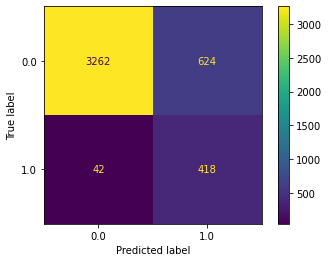

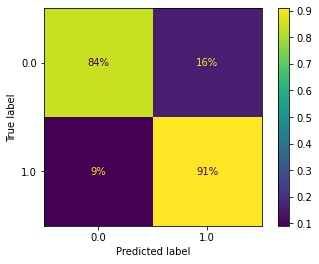

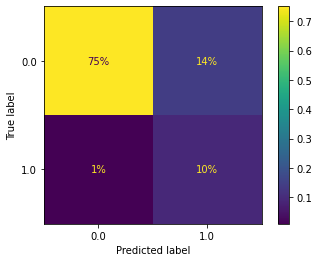

In [ ]:
# And we can print the confusion matrix as well
from sklearn.metrics import ConfusionMatrixDisplay
# Check for Light GBM model
ConfusionMatrixDisplay.from_estimator(clf_nb, Xh_test, yh_test)  
# Check for Naive Bayes model
ConfusionMatrixDisplay.from_estimator(clf_nb, Xh_test, yh_test, normalize='true', values_format='.0%')  
# Check for Naive Bayes model
ConfusionMatrixDisplay.from_estimator(clf_nb, Xh_test, yh_test, normalize='all', values_format='.0%')  

HIRED ROC Curve + Threshold

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

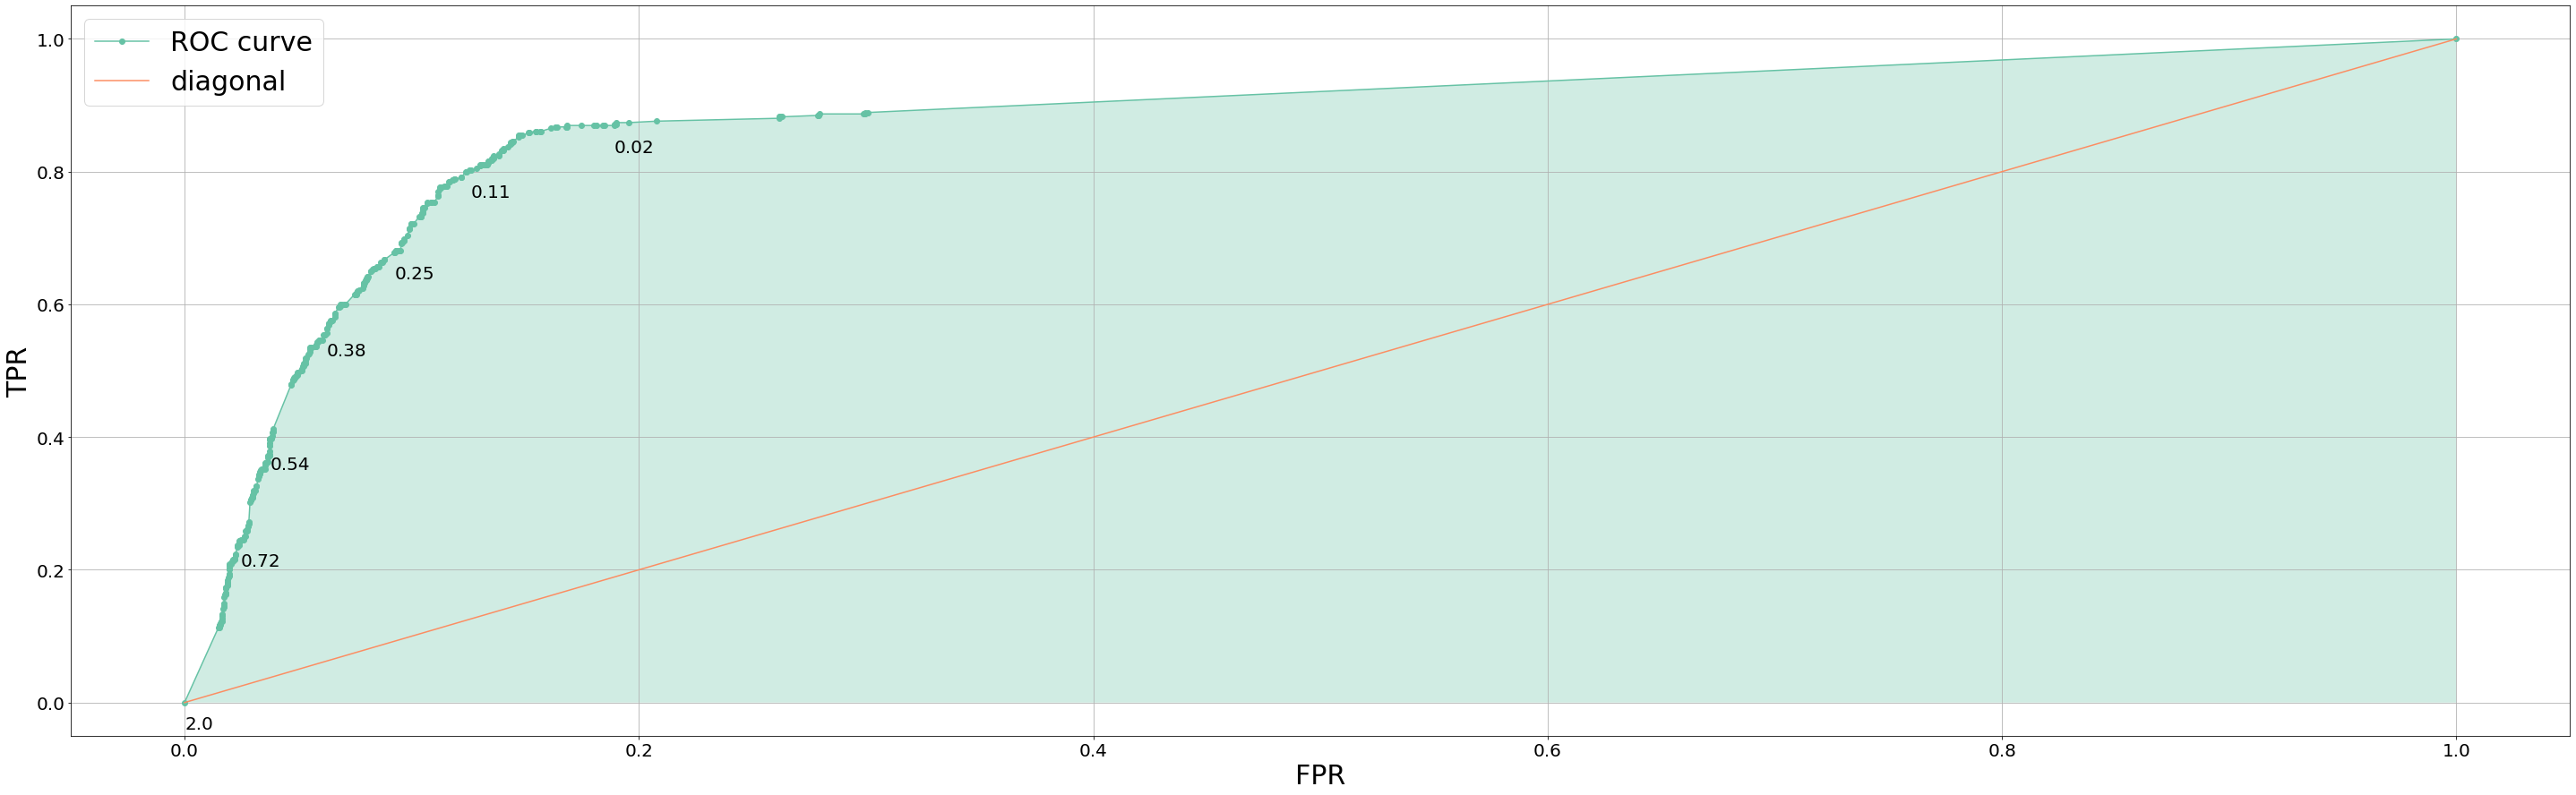

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

probs = clf_rf.predict_proba(Xh_test)
fpr, tpr, thresholds = metrics.roc_curve(yh_test, probs[:,1])

# %%
plt.subplots(figsize=(50, 15))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::50], tpr[::50], thresholds[::50]):
  plt.annotate(np.round(txt,2), (x, y-0.04), fontsize=20)

rnd_idx = 27
#plt.annotate('this point refers to the tpr and the fpr\n at a probability threshold of {}'.format(np.round(thresholds[rnd_idx], 2)), 
             #xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             #arrowprops=dict(facecolor='black', lw=2, arrowstyle='->'),)
plt.legend(loc="upper left", fontsize=30)
plt.xlabel("FPR", fontsize=30)
plt.ylabel("TPR", fontsize=30)
plt.fill_between(fpr,tpr,alpha=0.3)
plt.grid(axis='both')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

HIRED Hyper-parameter Tuning

In [ ]:
# Optimize the performance using a Grid-search and Cross-validation strategy 
# to search the best configurations (model and hyperparameters)
# This step takes a lot of time as it does an exasutive search of the parameters we selected for search

from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

# Create a dummy classifier for building the pipeline
pipe = Pipeline([('classifier', DummyClassifier())])

# Create space of candidate models and some of their hyperparameters
search_space = [{'classifier': [DecisionTreeClassifier(random_state=0)],
                 'classifier__max_leaf_nodes': [3, 5,10, 50, 100,],
                 'classifier__max_depth': [None,3, 5, 10, 15,20]},
                {'classifier': [RandomForestClassifier(random_state=0,bootstrap=False)],
                 'classifier__n_estimators': [2, 3, 5, 10, 25, 50, 100],
                 'classifier__max_features': [2, 3, 4],
                 'classifier__min_samples_leaf': [3, 4, 5],
                 'classifier__max_depth': [None, 3, 5, 10, 15, 20]},
               {'classifier': [LGBMClassifier(random_state=0)],
                 'classifier__num_leaves': [5, 10, 15, 20],
                 'classifier__n_estimators': [10, 50, 100, 500]}]


# Search the space in a grid-like approach, selecting at the end the model with the best ROC AUC metric
from sklearn.model_selection import GridSearchCV
gsh = GridSearchCV(pipe, search_space, cv=10, verbose=0, scoring='f1')
best_modelh = gsh.fit(Xh_train, yh_train)

# See which model was the best
best_modelh.best_estimator_.get_params()['classifier']

LGBMClassifier(n_estimators=500, num_leaves=20, random_state=0)

HIRED Best Model Classification Report

In [ ]:
yh_pred = best_modelh.predict(Xh_test)
print(classification_report(yh_test, yh_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      3886
         1.0       0.57      0.41      0.48       460

    accuracy                           0.90      4346
   macro avg       0.75      0.69      0.71      4346
weighted avg       0.89      0.90      0.90      4346



HIRED Best Model Confusion Matrix

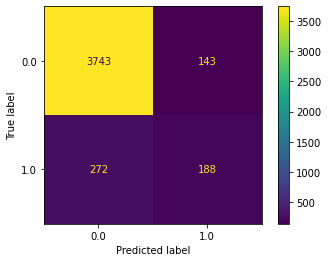

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_modelh, Xh_test, yh_test)  

HIRED Best Model Evaluation

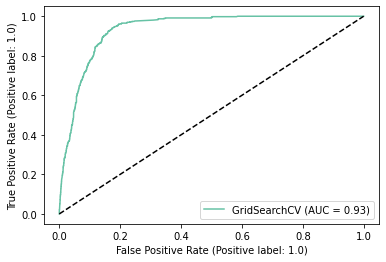

In [ ]:
RocCurveDisplay.from_estimator(best_modelh, Xh_test, yh_test)
plt.plot([0,1], [0,1],  "k--");

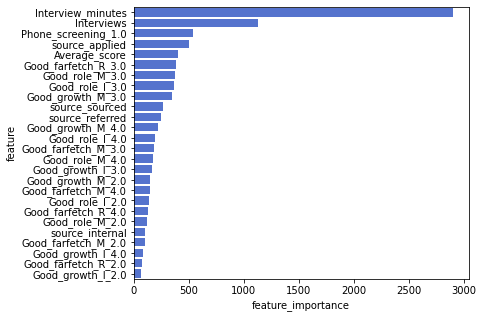

In [ ]:
# See which features are most important for the best model, in this case was a LGBM model

dfh_feat = pd.DataFrame({'feature': Xh_test.columns,
                        'feature_importance': best_modelh.best_estimator_.named_steps["classifier"].feature_importances_}) \
                        .sort_values('feature_importance', ascending=False) \
                        .reset_index(drop=True)
plt.figure(figsize=(6, 5))
sns_feats = sns.barplot(x='feature_importance', y='feature', data=dfh_feat, orient='h', color='royalblue')

HIRED Model Interpretation/Explanation

In [ ]:
dfh2['Good_farfetch_R_3.0'].value_counts()

0    18904
1     2823
Name: Good_farfetch_R_3.0, dtype: int64

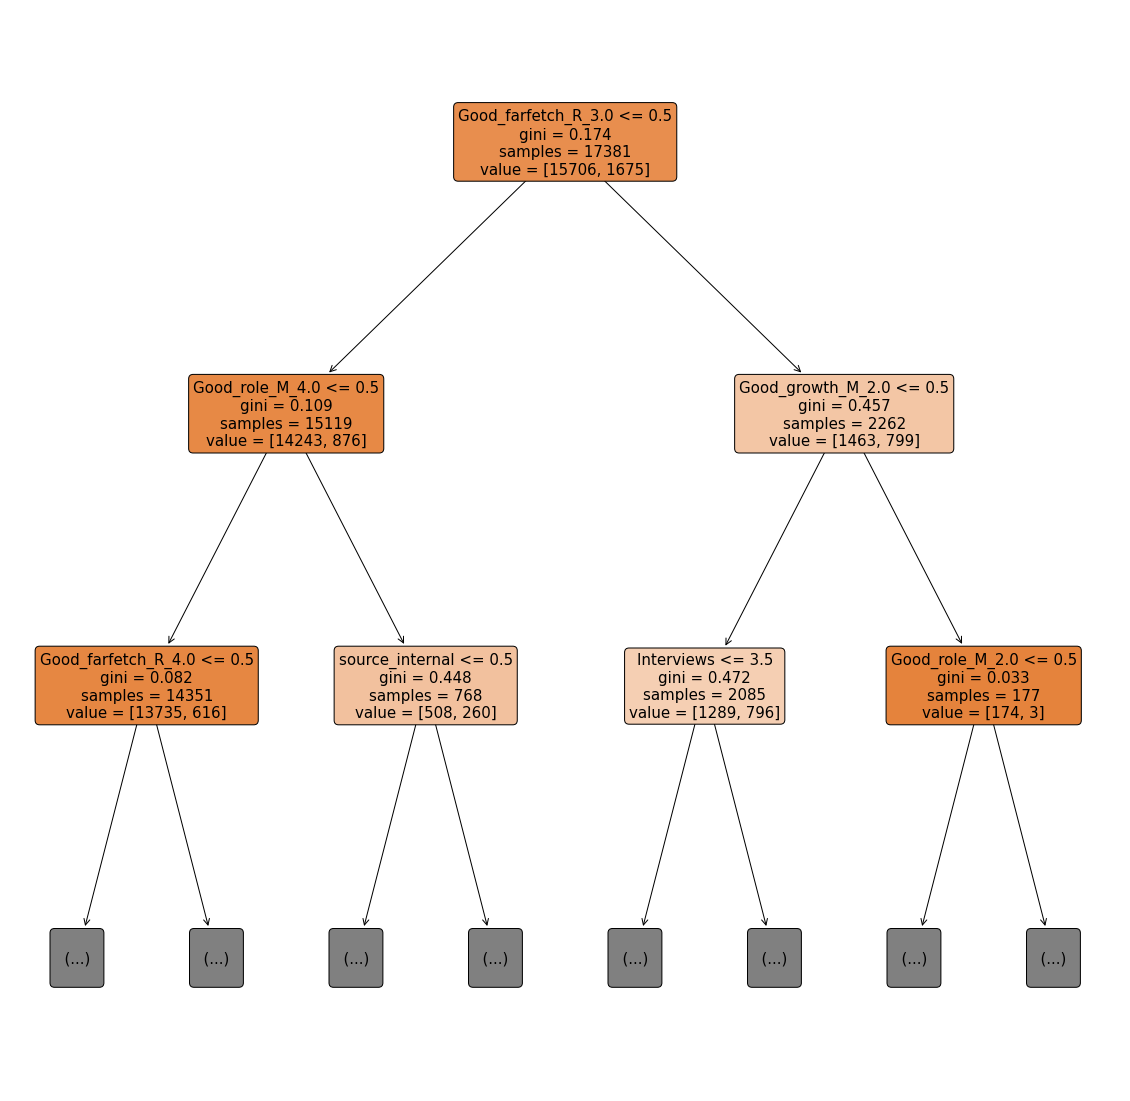

In [ ]:
# Random Forest as well as GBM-based models, build many Decision Trees.
# We can inspect each tree individually to understand some model decisions.
# To plot a tree from LGBM we would need install graphviz. For that reason, we show here just a tree from our RF model.

from sklearn import tree
plt.figure(figsize=(20,20))

tree.plot_tree(clf_rf.estimators_[0], max_depth=2, feature_names=Xh.columns, class_names=None, label='all', filled=True,impurity=True, node_ids=False, proportion=False, rounded=True, precision=3, ax=None, fontsize=15)

# Save tree as svg figure to local folder
plt.savefig('./One_RF_Tree.svg', format='svg', dpi=300)

## SMOTE

In [ ]:
# check both datasets have the same distribution
yh_train.value_counts(normalize=True), yh_test.value_counts(normalize=True)

(0.0    0.90363
 1.0    0.09637
 Name: Hired, dtype: float64, 0.0    0.894156
 1.0    0.105844
 Name: Hired, dtype: float64)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_smote, y_smote = sm.fit_resample(Xh_train, yh_train)

In [ ]:
np.bincount(y_smote)
#Now our training set has class balance, thanks to synthetic oversampling of minority class.

array([15706, 15706])

In [ ]:
# check both datasets have the same distribution
y_smote.value_counts(normalize=True), yh_test.value_counts(normalize=True)

(0.0    0.5
 1.0    0.5
 Name: Hired, dtype: float64, 0.0    0.894156
 1.0    0.105844
 Name: Hired, dtype: float64)

SMOTE Algorithms

In [ ]:
# Fit models to training dataset
clf_rf_smote = RandomForestClassifier(random_state=0)
clf_rf_smote.fit(X_smote, y_smote)

#clf_logreg = LogisticRegression(random_state=0)
#clf_logreg.fit(Xh_train, yh_train)

clf_nb_smote = GaussianNB()
clf_nb_smote.fit(X_smote, y_smote)

clf_knn_smote = KNeighborsClassifier()
clf_knn_smote.fit(X_smote, y_smote)

clf_dt_smote = DecisionTreeClassifier(random_state=0)
clf_dt_smote.fit(X_smote, y_smote)

clf_lgb_smote = LGBMClassifier(random_state=0)
clf_lgb_smote.fit(X_smote, y_smote);

In [ ]:
y_pred_rf_smote = clf_rf_smote.predict(Xh_test)
y_pred_nb_smote = clf_nb_smote.predict(Xh_test)
y_pred_knn_smote = clf_knn_smote.predict(Xh_test)
y_pred_dt_smote = clf_dt_smote.predict(Xh_test)
y_pred_lgb_smote = clf_lgb_smote.predict(Xh_test)

SMOTE Classification Reports

In [ ]:
#Classification report
# Check for LGBM model

print(classification_report(yh_test, y_pred_lgb_smote))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.92      3886
         1.0       0.43      0.74      0.55       460

    accuracy                           0.87      4346
   macro avg       0.70      0.81      0.74      4346
weighted avg       0.91      0.87      0.88      4346



In [ ]:
# Check for DT model

print(classification_report(yh_test, y_pred_dt_smote))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      3886
         1.0       0.43      0.53      0.48       460

    accuracy                           0.88      4346
   macro avg       0.69      0.73      0.70      4346
weighted avg       0.89      0.88      0.88      4346



In [ ]:
# Check for KNN model

print(classification_report(yh_test, y_pred_knn_smote))

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      3886
         1.0       0.37      0.79      0.50       460

    accuracy                           0.83      4346
   macro avg       0.67      0.81      0.70      4346
weighted avg       0.91      0.83      0.86      4346



In [ ]:
# Check for RF model

print(classification_report(yh_test, y_pred_rf_smote))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      3886
         1.0       0.45      0.61      0.52       460

    accuracy                           0.88      4346
   macro avg       0.70      0.76      0.72      4346
weighted avg       0.90      0.88      0.89      4346



In [ ]:
# Check for NB model

print(classification_report(yh_test, y_pred_nb_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.31      0.47      3886
         1.0       0.14      0.98      0.25       460

    accuracy                           0.38      4346
   macro avg       0.57      0.64      0.36      4346
weighted avg       0.90      0.38      0.45      4346



SMOTE Train Evaluation

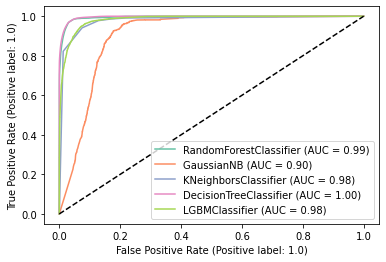

In [ ]:
# Check first AUC performance on training dataset
ax = plt.gca()
RocCurveDisplay.from_estimator(clf_rf_smote, X_smote, y_smote, ax=ax)
#RocCurveDisplay.from_estimator(clf_logreg, X_smote, y_smote, ax=ax)
RocCurveDisplay.from_estimator(clf_nb_smote, X_smote, y_smote, ax=ax)
RocCurveDisplay.from_estimator(clf_knn_smote, X_smote, y_smote, ax=ax)
RocCurveDisplay.from_estimator(clf_dt_smote, X_smote, y_smote, ax=ax)
RocCurveDisplay.from_estimator(clf_lgb_smote, X_smote, y_smote, ax=ax)

plt.plot([0,1],[0,1],  "k--");

SMOTE Test Evaluation

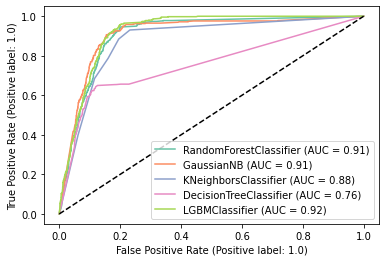

In [ ]:
# Check now AUC performance in the test dataset to assess generalization capabilities of each model.
ax = plt.gca()
RocCurveDisplay.from_estimator(clf_rf_smote, Xh_test, yh_test, ax=ax)
#RocCurveDisplay.from_estimator(clf_logreg_smote, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_nb_smote, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_knn_smote, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_dt_smote, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_lgb_smote, Xh_test, yh_test, ax=ax)

plt.plot([0,1], [0,1],  "k--");

SMOTE Hyper-Parameter Tuning

In [ ]:
# Create a dummy classifier for building the pipeline
pipe_smote = Pipeline([('classifier', DummyClassifier())])

# Create space of candidate models and some of their hyperparameters
search_space_smote = [{'classifier': [DecisionTreeClassifier(random_state=0)],
                 'classifier__max_leaf_nodes': [3, 5,10, 50, 100,],
                 'classifier__max_depth': [None,3, 5, 10, 15,20]},
                {'classifier': [RandomForestClassifier(random_state=0)],
                 'classifier__n_estimators': [2, 3, 5, 10, 25, 50, 100],
                 'classifier__max_features': [2, 3, 4],
                 'classifier__min_samples_leaf': [3, 4, 5],
                 'classifier__max_depth': [None, 3, 5, 10, 15, 20]},
               {'classifier': [LGBMClassifier(random_state=0)],
                 'classifier__num_leaves': [5, 10, 15, 20],
                 'classifier__n_estimators': [10, 50, 100, 500]}]

# Search the space in a grid-like approach, selecting at the end the model with the best ROC AUC metric
from sklearn.model_selection import GridSearchCV
gs_s = GridSearchCV(pipe_smote, search_space_smote, cv=5, verbose=0, scoring='f1')
best_model_s = gs_s.fit(X_smote, y_smote)

# See which model was the best
best_model_s.best_estimator_.get_params()['classifier']

RandomForestClassifier(max_features=4, min_samples_leaf=3, random_state=0)

SMOTE Best Model Classification Report

In [ ]:
RFyh_pred_smote = best_model_s.predict(Xh_test)
print(classification_report(yh_test, yh_pred_smote))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      3886
         1.0       0.45      0.84      0.59       460

    accuracy                           0.88      4346
   macro avg       0.72      0.86      0.76      4346
weighted avg       0.92      0.88      0.89      4346



SMOTE Best Model Evaluation

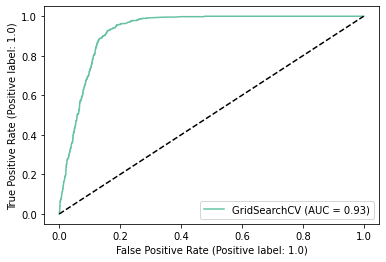

In [ ]:
RocCurveDisplay.from_estimator(best_model_s, Xh_test, yh_test)
plt.plot([0,1], [0,1],  "k--");

SMOTE Confusion Matrix

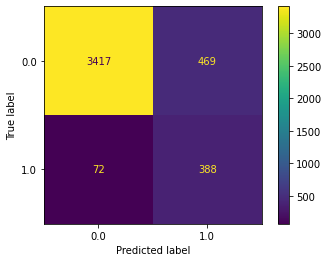

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_model_s, Xh_test, yh_test)  

SMOTE Best Model Feature Importance

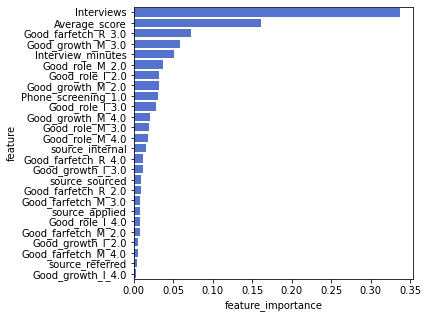

In [ ]:
# See which features are most important for the best model, in this case was a RF model

dfh_feat_s = pd.DataFrame({'feature': Xh_test.columns,
                        'feature_importance': best_model_s.best_estimator_.named_steps["classifier"].feature_importances_}) \
                        .sort_values('feature_importance', ascending=False) \
                        .reset_index(drop=True)
plt.figure(figsize=(5, 5))
sns_feats = sns.barplot(x='feature_importance', y='feature', data=dfh_feat_s, orient='h', color='royalblue', )

## DATA MODELING IMPROVED

In [ ]:
dfi = dfi.dropna(subset=['Average_score','Gender'])

In [ ]:
#Verificação dos nulos
dfi.isnull().sum()

application            0
Average_score          0
Interviews             0
Gender                 0
Target(improved)       0
Good_farfetch_I     1265
Good_farfetch_M     1007
Good_farfetch_R      737
Good_growth_I       1179
Good_growth_M        518
Good_growth_R       1362
Good_role_I          879
Good_role_M          599
Good_role_R         1293
location              22
source                 0
dtype: int64

In [ ]:
#Dropp application
dfi = dfi.drop(['application'], axis=1)

In [ ]:
dfi.head()

Average_score  Interviews  Gender  ...  Good_role_R      location    source
7             3.0         4.0     1.0  ...          NaN      PT Porto   applied
9             4.0         2.0     2.0  ...          NaN      PT Porto   applied
21            3.0         1.0     2.0  ...          NaN      PT Porto   applied
24            3.0         5.0     1.0  ...          NaN     UK London   applied
45            3.0         3.0     1.0  ...          NaN  PT Guimarães  referred

[5 rows x 15 columns]

In [ ]:
# One-hot encode variables
# Get dummies

Good_farfetch_Ri = pd.get_dummies(dfi['Good_farfetch_R'], prefix='Good_farfetch_R', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi, Good_farfetch_Ri], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['Good_farfetch_R'], axis=1)

Good_farfetch_Ii = pd.get_dummies(dfi['Good_farfetch_I'], prefix='Good_farfetch_I', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi2, Good_farfetch_Ii], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['Good_farfetch_I'], axis=1)

# Get dummies
Good_farfetch_Mi = pd.get_dummies(dfi['Good_farfetch_M'], prefix='Good_farfetch_M', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi2, Good_farfetch_Mi], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['Good_farfetch_M'], axis=1)

# Get dummies
Good_growth_Ii = pd.get_dummies(dfi['Good_growth_I'], prefix='Good_growth_I', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi2, Good_growth_Ii], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['Good_growth_I'], axis=1)

# Get dummies
Good_growth_Ri = pd.get_dummies(dfi['Good_growth_R'], prefix='Good_growth_R', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi2, Good_growth_Ri], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['Good_growth_R'], axis=1)

# Get dummies
Good_growth_Mi = pd.get_dummies(dfi['Good_growth_M'], prefix='Good_growth_M', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi2, Good_growth_Mi], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['Good_growth_M'], axis=1)

# Get dummies
Good_role_Ri = pd.get_dummies(dfi['Good_role_R'], prefix='Good_role_R', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi2, Good_role_Ri], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['Good_role_R'], axis=1)

# Get dummies
Good_role_Ii = pd.get_dummies(dfi['Good_role_I'], prefix='Good_role_I', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi2, Good_role_Ii], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['Good_role_I'], axis=1)

# Get dummies
Good_role_Mi = pd.get_dummies(dfi['Good_role_M'], prefix='Good_role_M', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi2, Good_role_Mi], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['Good_role_M'], axis=1)

# Get dummies
location = pd.get_dummies(dfi2['location'], prefix='location', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi2, location], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['location'], axis=1)

# Get dummies
source = pd.get_dummies(dfi2['source'], prefix='source', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi2, source], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['source'], axis=1)


In [ ]:
# One-hot encode variables
# Get dummies
Gender = pd.get_dummies(dfi2['Gender'], prefix='Gender', drop_first=True)
Average_score = pd.get_dummies(dfi2['Average_score'], prefix='ScoreI', drop_first=True)
# Join the datasets
dfi2 = pd.concat([dfi2, Gender, Average_score], axis=1)
# Drop the original column
dfi2 = dfi2.drop(['Gender', 'Average_score'], axis=1)


In [ ]:
#Drop da application<
dfi2 = dfi2.drop(['location_IN Delhi NCR', 'location_US Chicago Retail Store' , 'location_JP Tokyo','location_UK Browns Retail', 'location_PT Braga', 'Good_growth_R_4.0', 'Good_role_R_4.0', 'location_PT Recarei', 'location_IT Italy' , 'Good_growth_R_3.0'], axis=1)

In [ ]:
dfi2.head()

Interviews  Target(improved)  ...  ScoreI_3.0  ScoreI_4.0
7          4.0               0.0  ...           1           0
9          2.0               0.0  ...           0           1
21         1.0               0.0  ...           1           0
24         5.0               0.0  ...           1           0
45         3.0               1.0  ...           1           0

[5 rows x 34 columns]

In [ ]:
# Separate in Xi (variables) and yi (target) for modeling
Xi = dfi2.drop(['Target(improved)'], axis=1)
yi = dfi2['Target(improved)']

In [ ]:
# Split dataset in train and test datasets
# Create stratified datasets: train and test have the same percentage of positive cases
from sklearn.model_selection import train_test_split
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.20, stratify=yi, random_state=0)

In [ ]:
# check both datasets have the same distribution
yi_train.value_counts(normalize=True), yi_test.value_counts(normalize=True)

(0.0    0.740018
 1.0    0.259982
 Name: Target(improved), dtype: float64, 0.0    0.741135
 1.0    0.258865
 Name: Target(improved), dtype: float64)

Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

# Fit models to training dataset
clf_rf = RandomForestClassifier(random_state=0, bootstrap=False)
clf_rf.fit(Xi_train, yi_train)

clf_logreg = LogisticRegression(solver='lbfgs', max_iter=400, random_state=0)
clf_logreg.fit(Xi_train, yi_train)

clf_nb = GaussianNB()
clf_nb.fit(Xi_train, yi_train)

clf_knn = KNeighborsClassifier()
clf_knn.fit(Xi_train, yi_train)

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(Xi_train, yi_train)

clf_lgb = LGBMClassifier(random_state=0)
clf_lgb.fit(Xi_train, yi_train);

IMPROVED Train Evalutation

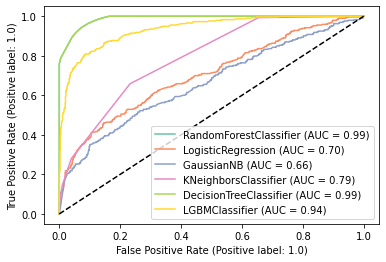

In [ ]:
# Check first AUC performance on training dataset
from sklearn.metrics import precision_recall_curve, RocCurveDisplay
from sklearn.metrics import plot_roc_curve, roc_curve

ax = plt.gca()
RocCurveDisplay.from_estimator(clf_rf, Xi_train, yi_train, ax=ax)
RocCurveDisplay.from_estimator(clf_logreg, Xi_train, yi_train, ax=ax)
RocCurveDisplay.from_estimator(clf_nb, Xi_train, yi_train, ax=ax)
RocCurveDisplay.from_estimator(clf_knn, Xi_train, yi_train, ax=ax)
RocCurveDisplay.from_estimator(clf_dt, Xi_train, yi_train, ax=ax)
RocCurveDisplay.from_estimator(clf_lgb, Xi_train, yi_train, ax=ax)

plt.plot([0,1],[0,1],  "k--");


IMPROVED Test Evalutation

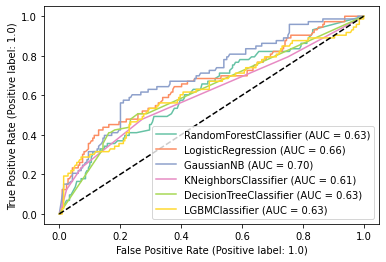

In [ ]:
# Check now AUC performance in the test dataset to assess generalization capabilities of each model.
# We can see that Decision Tree did not generalize. Decision Trees are known to overfit.
ax = plt.gca()
RocCurveDisplay.from_estimator(clf_rf, Xi_test, yi_test, ax=ax)
RocCurveDisplay.from_estimator(clf_logreg, Xi_test, yi_test, ax=ax)
RocCurveDisplay.from_estimator(clf_nb, Xi_test, yi_test, ax=ax)
RocCurveDisplay.from_estimator(clf_knn, Xi_test, yi_test, ax=ax)
RocCurveDisplay.from_estimator(clf_dt, Xi_test, yi_test, ax=ax)
RocCurveDisplay.from_estimator(clf_lgb, Xi_test, yi_test, ax=ax)

plt.plot([0,1], [0,1],  "k--");

IMPROVED Classification Reports

In [ ]:
# Can get more more performance metrics from classification_report
from sklearn.metrics import classification_report

# Check for Random Forest model
yi_pred = clf_rf.predict(Xi_test)
print(classification_report(yi_test, yi_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       209
         1.0       0.49      0.29      0.36        73

    accuracy                           0.74       282
   macro avg       0.64      0.59      0.60       282
weighted avg       0.71      0.74      0.71       282



In [ ]:
# Check for LGBM model
yi_pred = clf_lgb.predict(Xi_test)
print(classification_report(yi_test, yi_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       209
         1.0       0.54      0.29      0.38        73

    accuracy                           0.75       282
   macro avg       0.66      0.60      0.61       282
weighted avg       0.72      0.75      0.72       282



In [ ]:
# Check for KNeighbors model
yi_pred = clf_knn.predict(Xi_test)
print(classification_report(yi_test, yi_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85       209
         1.0       0.53      0.23      0.32        73

    accuracy                           0.75       282
   macro avg       0.65      0.58      0.58       282
weighted avg       0.71      0.75      0.71       282



In [ ]:
# Check for GaussianNB model
yi_pred = clf_nb.predict(Xi_test)
print(classification_report(yi_test, yi_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85       209
         1.0       0.54      0.21      0.30        73

    accuracy                           0.75       282
   macro avg       0.65      0.57      0.57       282
weighted avg       0.71      0.75      0.70       282



In [ ]:
# Check for Decision Tree model
yi_pred = clf_dt.predict(Xi_test)
print(classification_report(yi_test, yi_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       209
         1.0       0.46      0.36      0.40        73

    accuracy                           0.73       282
   macro avg       0.63      0.61      0.61       282
weighted avg       0.71      0.73      0.71       282



In [ ]:
# Check for Logistic Regressor
yi_pred = clf_logreg.predict(Xi_test)
print(classification_report(yi_test, yi_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86       209
         1.0       0.67      0.14      0.23        73

    accuracy                           0.76       282
   macro avg       0.72      0.56      0.54       282
weighted avg       0.74      0.76      0.69       282



IMPROVED Confusion Matrix

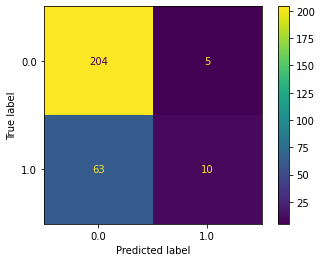

In [ ]:
# And we can print the confusion matrix as well
from sklearn.metrics import ConfusionMatrixDisplay
# Check for Random Forests model
ConfusionMatrixDisplay.from_estimator(clf_logreg, Xi_test, yi_test)  

IMPROVED Hyper-Parameter Tuning

In [ ]:
# Optimize the performance using a Grid-search and Cross-validation strategy 
# to search the best configurations (model and hyperparameters)
# This step takes a lot of time as it does an exasutive search of the parameters we selected for search

from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

# Create a dummy classifier for building the pipeline
pipe = Pipeline([('classifier', DummyClassifier())])

# Create space of candidate models and some of their hyperparameters
search_space = [{'classifier': [LogisticRegression(max_iter=400, random_state=0)],
                 'classifier__C': np.logspace(0, 0.5, 1, 2, 5)},
                #{'classifier': [GaussianNB()],
                 #'classifier__n_features_in':[0, 1, 2, 5]},
                {'classifier': [RandomForestClassifier(random_state=0)],
                 'classifier__n_estimators': [10, 50, 100, 500, 1000],
                 'classifier__max_depth': [None, 5, 10, 15]},
               {'classifier': [LGBMClassifier(random_state=0)],
                 'classifier__num_leaves': [5,10,15,20],
                 'classifier__n_estimators': [10, 50, 100, 500, 1000]}]

# Search the space in a grid-like approach, selecting at the end the model with the best ROC AUC metric
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(pipe, search_space, cv=10, verbose=0, scoring='f1')
best_modeli = gs.fit(Xi_train, yi_train)

# See which model was the best
best_modeli.best_estimator_.get_params()['classifier']

LGBMClassifier(n_estimators=500, num_leaves=10, random_state=0)

IMPROVED Best Model Classification Report

In [ ]:
yi_pred = best_modeli.predict(Xi_test)
print(classification_report(yi_test, yi_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       209
         1.0       0.48      0.27      0.35        73

    accuracy                           0.73       282
   macro avg       0.63      0.58      0.59       282
weighted avg       0.70      0.73      0.71       282



IMPROVED Best Model Evaluation

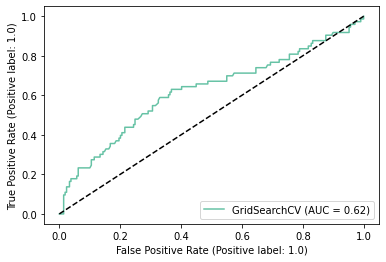

In [ ]:
# Check the ROC curve of the best model performance 
RocCurveDisplay.from_estimator(best_modeli, Xi_test, yi_test)
plt.plot([0,1], [0,1],  "k--");

IMPROVED Best Model Feature Importance

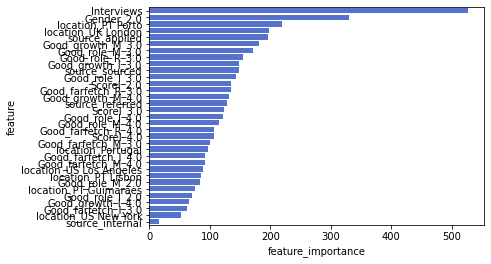

In [ ]:
# See which features are most important for the best model, in this case was a LGBM model

dfi_feat = pd.DataFrame({'feature': Xi_test.columns,
                        'feature_importance': best_modeli.best_estimator_.named_steps["classifier"].feature_importances_}) \
                        .sort_values('feature_importance', ascending=False) \
                        .reset_index(drop=True)

sns_feats = sns.barplot(x='feature_importance', y='feature', data=dfi_feat, orient='h', color='royalblue')

In [ ]:
dfi2['location_Portugal'].value_counts()

0    1364
1      45
Name: location_Portugal, dtype: int64

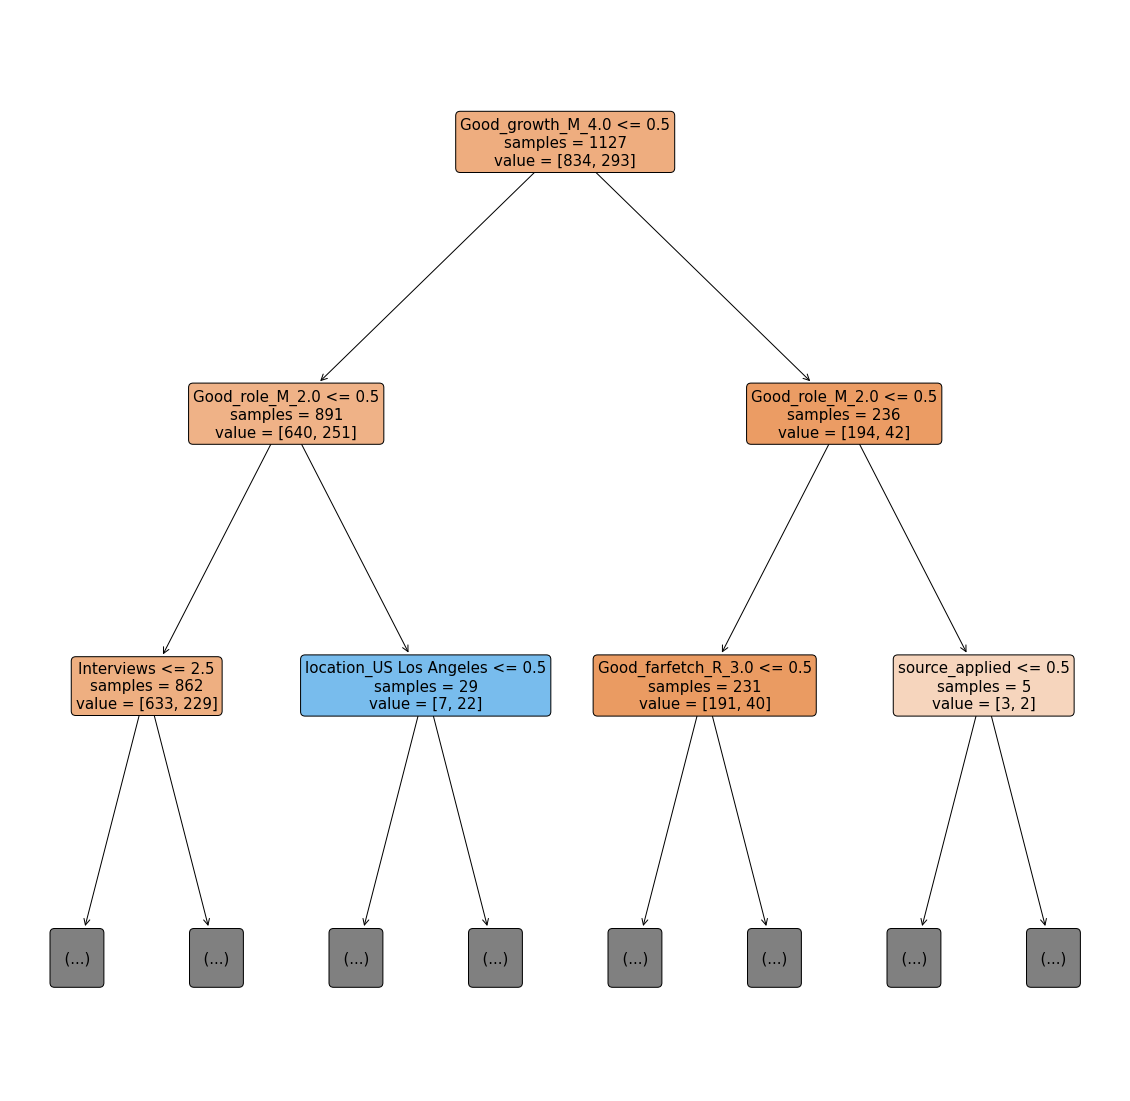

In [ ]:
# Random Forest as well as GBM-based models, build many Decision Trees.
# We can inspect each tree individually to understand some model decisions.
# To plot a tree from LGBM we would need install graphviz. For that reason, we show here just a tree from our RF model.

from sklearn import tree
plt.figure(figsize=(20,20))

tree.plot_tree(clf_rf.estimators_[0], max_depth=2, feature_names=Xi.columns, class_names=None, label='all', filled=True,impurity=False, node_ids=False, proportion=False, rounded=True, precision=3, ax=None, fontsize=15)

# Save tree as svg figure to local folder
plt.savefig('./One_RF_Tree.svg', format='svg', dpi=300)

## TOMEK

In [ ]:
# define the undersampling method
undersample = TomekLinks()

Because the procedure only removes so-named “Tomek Links“, we would not expect the resulting transformed dataset to be balanced, only less ambiguous along the class boundary.

Counter({0: 9900, 1: 100})
Counter({0: 9874, 1: 100})


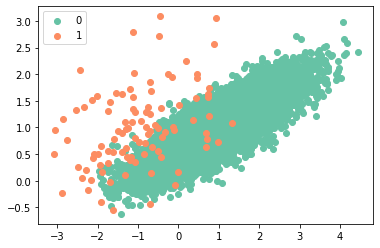

In [ ]:
# Undersample and plot imbalanced dataset with Tomek Links
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot
from numpy import where

# define dataset
Xh, yh = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(yh)
print(counter)
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
Xh, yh = undersample.fit_resample(Xh, yh)
# summarize the new class distribution
counter = Counter(yh)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(yh == label)[0]
	pyplot.scatter(Xh[row_ix, 0], Xh[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## SMOTE & TOMEK

In [ ]:
# check both datasets have the same distribution
yh_train.value_counts(normalize=True), yh_test.value_counts(normalize=True)

(0.0    0.90363
 1.0    0.09637
 Name: Hired, dtype: float64, 0.0    0.894156
 1.0    0.105844
 Name: Hired, dtype: float64)

In [ ]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=1)
X_smote, y_smote = sm.fit_resample(Xh_train, yh_train)

In [ ]:
np.bincount(y_smote)
#Now our training set has class balance, thanks to synthetic oversampling of minority class.

array([15705, 15705])

In [ ]:
# check both datasets have the same distribution
y_smote.value_counts(normalize=True), yh_test.value_counts(normalize=True)

(0.0    0.5
 1.0    0.5
 Name: Hired, dtype: float64, 0.0    0.894156
 1.0    0.105844
 Name: Hired, dtype: float64)

SMOTE Algorithms

In [ ]:
# Fit models to training dataset
clf_rf_smote = RandomForestClassifier(random_state=0)
clf_rf_smote.fit(X_smote, y_smote)

#clf_logreg = LogisticRegression(random_state=0)
#clf_logreg.fit(Xh_train, yh_train)

clf_nb_smote = GaussianNB()
clf_nb_smote.fit(X_smote, y_smote)

clf_knn_smote = KNeighborsClassifier()
clf_knn_smote.fit(X_smote, y_smote)

clf_dt_smote = DecisionTreeClassifier(random_state=0)
clf_dt_smote.fit(X_smote, y_smote)

clf_lgb_smote = LGBMClassifier(random_state=0)
clf_lgb_smote.fit(X_smote, y_smote);

In [ ]:
y_pred_rf_smote = clf_rf_smote.predict(Xh_test)
y_pred_nb_smote = clf_nb_smote.predict(Xh_test)
y_pred_knn_smote = clf_knn_smote.predict(Xh_test)
y_pred_dt_smote = clf_dt_smote.predict(Xh_test)
y_pred_lgb_smote = clf_lgb_smote.predict(Xh_test)

SMOTE Classification Reports

In [ ]:
#Classification report
# Check for LGBM model

print(classification_report(yh_test, y_pred_lgb_smote))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      3886
         1.0       0.44      0.74      0.55       460

    accuracy                           0.87      4346
   macro avg       0.70      0.82      0.74      4346
weighted avg       0.91      0.87      0.89      4346



In [ ]:
# Check for DT model

print(classification_report(yh_test, y_pred_dt_smote))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      3886
         1.0       0.43      0.53      0.48       460

    accuracy                           0.88      4346
   macro avg       0.69      0.73      0.70      4346
weighted avg       0.89      0.88      0.88      4346



In [ ]:
# Check for KNN model

print(classification_report(yh_test, y_pred_knn_smote))

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      3886
         1.0       0.37      0.81      0.51       460

    accuracy                           0.84      4346
   macro avg       0.67      0.83      0.71      4346
weighted avg       0.91      0.84      0.86      4346



In [ ]:
# Check for RF model

print(classification_report(yh_test, y_pred_rf_smote))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      3886
         1.0       0.44      0.61      0.51       460

    accuracy                           0.88      4346
   macro avg       0.70      0.76      0.72      4346
weighted avg       0.90      0.88      0.88      4346



In [ ]:
# Check for NB model

print(classification_report(yh_test, y_pred_nb_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.31      0.47      3886
         1.0       0.14      0.98      0.25       460

    accuracy                           0.38      4346
   macro avg       0.57      0.64      0.36      4346
weighted avg       0.90      0.38      0.45      4346



SMOTE Train Evaluation

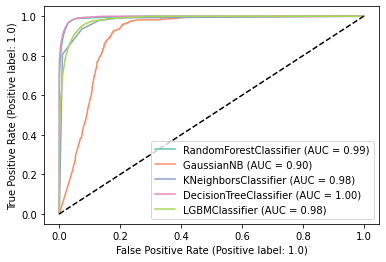

In [ ]:
# Check first AUC performance on training dataset
ax = plt.gca()
RocCurveDisplay.from_estimator(clf_rf_smote, X_smote, y_smote, ax=ax)
#RocCurveDisplay.from_estimator(clf_logreg, X_smote, y_smote, ax=ax)
RocCurveDisplay.from_estimator(clf_nb_smote, X_smote, y_smote, ax=ax)
RocCurveDisplay.from_estimator(clf_knn_smote, X_smote, y_smote, ax=ax)
RocCurveDisplay.from_estimator(clf_dt_smote, X_smote, y_smote, ax=ax)
RocCurveDisplay.from_estimator(clf_lgb_smote, X_smote, y_smote, ax=ax)

plt.plot([0,1],[0,1],  "k--");

SMOTE Test Evaluation

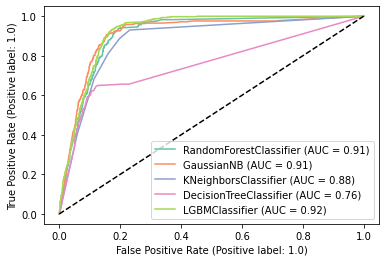

In [ ]:
# Check now AUC performance in the test dataset to assess generalization capabilities of each model.
ax = plt.gca()
RocCurveDisplay.from_estimator(clf_rf_smote, Xh_test, yh_test, ax=ax)
#RocCurveDisplay.from_estimator(clf_logreg_smote, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_nb_smote, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_knn_smote, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_dt_smote, Xh_test, yh_test, ax=ax)
RocCurveDisplay.from_estimator(clf_lgb_smote, Xh_test, yh_test, ax=ax)

plt.plot([0,1], [0,1],  "k--");

SMOTE Hyper-Parameter Tuning

In [ ]:
# Create a dummy classifier for building the pipeline
pipe_smote = Pipeline([('classifier', DummyClassifier())])

# Create space of candidate models and some of their hyperparameters
search_space_smote = [{'classifier': [DecisionTreeClassifier(random_state=0)],
                 'classifier__max_leaf_nodes': [3, 5,10, 50, 100,],
                 'classifier__max_depth': [None,3, 5, 10, 15,20]},
                {'classifier': [RandomForestClassifier(random_state=0)],
                 'classifier__n_estimators': [2, 3, 5, 10, 25, 50, 100],
                 'classifier__max_features': [2, 3, 4],
                 'classifier__min_samples_leaf': [3, 4, 5],
                 'classifier__max_depth': [None, 3, 5, 10, 15, 20]},
               {'classifier': [LGBMClassifier(random_state=0)],
                 'classifier__num_leaves': [5, 10, 15, 20],
                 'classifier__n_estimators': [10, 50, 100, 500]}]

# Search the space in a grid-like approach, selecting at the end the model with the best ROC AUC metric
from sklearn.model_selection import GridSearchCV
gs_s = GridSearchCV(pipe_smote, search_space_smote, cv=5, verbose=0, scoring='f1')
best_model_s = gs_s.fit(X_smote, y_smote)

# See which model was the best
best_model_s.best_estimator_.get_params()['classifier']

RandomForestClassifier(max_features=4, min_samples_leaf=3, n_estimators=50,
                       random_state=0)

SMOTE Best Model Classification Report

In [ ]:
RFyh_pred_smote = best_model_s.predict(Xh_test)
print(classification_report(yh_test, yh_pred_smote))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      3886
         1.0       0.45      0.84      0.59       460

    accuracy                           0.88      4346
   macro avg       0.72      0.86      0.76      4346
weighted avg       0.92      0.88      0.89      4346



SMOTE Best Model Evaluation

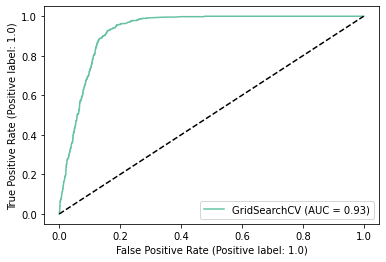

In [ ]:
RocCurveDisplay.from_estimator(best_model_s, Xh_test, yh_test)
plt.plot([0,1], [0,1],  "k--");

SMOTE Confusion Matrix

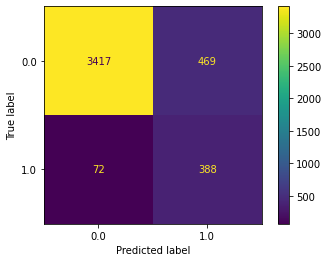

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_model_s, Xh_test, yh_test)  

SMOTE Best Model Feature Importance

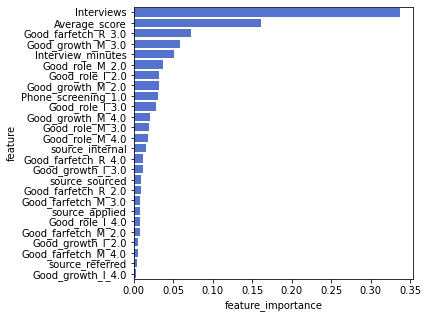

In [ ]:
# See which features are most important for the best model, in this case was a RF model

dfh_feat_s = pd.DataFrame({'feature': Xh_test.columns,
                        'feature_importance': best_model_s.best_estimator_.named_steps["classifier"].feature_importances_}) \
                        .sort_values('feature_importance', ascending=False) \
                        .reset_index(drop=True)
plt.figure(figsize=(5, 5))
sns_feats = sns.barplot(x='feature_importance', y='feature', data=dfh_feat_s, orient='h', color='royalblue', )